### Zadanie1: Jaką minimalną i maksymalną wartość może przyjmować współczynnik Giniego? Uzasadnij. Co to wtedy oznacza?

Minimalna wartość współczynnika Giniego wynosi 0, maksymalna wynosi 1. Drugi człon wzoru to suma kwadratów odsetków danych tej samej kategorii, największa wartość tej sumy może być 1, najmniejsza 0, z czego wynikają minimalna(1-1=0) i maksymalna(1-0=1) wartości współczynnika. Współczynnik Giniego mierzy jak dobrze rozdzielone dane -> chcemy jak najbardziej zminimalizować jego wartość, najlepiej żeby współczynnik był 0. 

### Zadanie2: Uzasadnij wartość entropii w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [154]:
from math import log2

samples = 105

value_1 = 34/samples
value_2 = 32/samples
value_3 = 39/samples

entropia = -(value_1*log2(value_1) + value_2*log2(value_2) + value_3*log2(value_3))

print("Entropia wynosi", round(entropia,2))

Entropia wynosi 1.58


### Zadanie3: Uzasadnij wartość indeksu Giniego w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [155]:
gini = 1 - value_1**2 - value_2**2 - value_3**2

print("Współczynnik Giniego wynosi", round(gini,3))

Współczynnik Giniego wynosi 0.664


### Zadanie4: Przeczytaj https://predictivesolutions.pl/jak-udoskonalic-algorytm-drzew-decyzyjnych. Sporządź odpowiednią notatkę.

Drzewa decyzyjne stosuje się do podzielenia dużej liczby obserwacji na mniejsze zbiory z zastosowaniem reguł "jeżeli.. to..". Wadą tego algorytmu jest wrażliwość na specyfikę zbiorów danych, czyli niestabilność wynikow. 

Metody ulepszające metodę drzew decyzyjnych:

1) Agregacja Bootstrapowa (bagging) polega na wytworzeniu podzbiorów uczących z pierwotnego zbioru danych poprzez losowanie ze zwracaniem. Część danych nie zostaje wybrana do próby uczacej i pełni rolę zbioru walidacyjnego (Out of Bag). Następnie, na kazdej z prób buduje się model drzewa, ostateczny wynik predykcji jest wybierany na podstawie głosowania. Wadami są używanie tych samych predyktorów, a także to że uzyskanie ostatecznego wyniku jest czasochłonne i skomplikowane. 

2) Zasada działania algorytmu Lasów losowych (Random forest) jest podobna do baggingu(losowanie danych ze zwracaniem, tworzenie zbioru walidacyjnego, wynik wybierany przez głosowanie), tylko do tworzenia poszczególnych drzew jest używana część predyktorów, a nie wszystkie dostępne. Także do każdego podzbioru na podstawie losowania wybiera się odpowiednie zmienne objaśniające. Wadami są czasochłonne obliczenia oraz trudniejsza interpretacja wyników. 

3) AdaBoost (Adaptative Boosting), czyli wzmocnienie adaptacyjne, polega na łączeniu klasyfikatorów(pojedynczych modeli w zespoły). Ideą jest zbudowanie złożonego modelu(zespołu) o dużej sile predykcyjnej, który składa się ze "słabych" klasyfikatorów. AdaBoost działa w sposób sekwencyjny, w odróżnieniu od lasów lasowych. Każde kolejne drzewo stara się wyeliminować błędy poprzedniego. Wadą jest łatwość do przetrenowania. 

4) XGBoost (Extreme Gradient Boosting), czyli algorytm wzmacniania gradientowego, ma podobne działanie jak poprzedni. Inowacją jest wprowadzenie składnika regularyzacji, przez którą jest regulowana złożoność modelu i zapobiega przetrenowaniu.  

### Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping). Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtórzymy n razy, otrzymamy n elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać. Pokaż, że dla dużych n próba będzie zawierała średnio 63% przypadków z orginalnego zbioru.

In [156]:
import numpy as np
import random


data_original = np.arange(1,101).tolist() #generuje pierwotny zbior danych 

data_new = []
for i in range(10000):
    
    #generuje zbiory ze zbioru pierwotnego za pomocą losowania ze zwracaniem 
    data_new.append(random.choices(data_original, k = 100))
    

suma = 0    
for data in data_new:
    
    #na ile się pokrywa zbior wygenerowany a pierwotny
    suma += len(set(data))/len(data_original)
    
#sredni % przypaków z originalnego zbioru
mean = suma/len(data_new)*100

print("Dla n =", n, "próba zawiera średnio", round(mean,0), "% przypadków z originalnego zbioru.")


Dla n = 5696 próba zawiera średnio 63.0 % przypadków z originalnego zbioru.


### Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968). Jeden nagłówek to jeden rekord.

### Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.

### Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?

### Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe. Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa (długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr). Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

In [157]:
with open('fake.txt') as f:
    records_fake = f.readlines()

In [158]:
with open('real.txt') as f:
    records_real = f.readlines()

In [159]:
#usuwam znaczek /n

records_fake = [string.rstrip() for string in records_fake] 
records_real = [string.rstrip() for string in records_real] 

In [160]:
#wszytkie słowa z małej litery

records_fake = [string.lower() for string in records_fake] 
records_real = [string.lower() for string in records_real] 

In [161]:
#biblioteki potrzebne do czyszczenia słów

from nltk.corpus import stopwords 
import string

stop_words = set(stopwords.words("english")) #angielskie stopwords

In [162]:
from nltk.tokenize import word_tokenize

#tokenizacja na słowa, oczyszczenie od stopwordsów, znaków interpunkcyjnuch i liczb

words_fake = [] 
words_real = []
all_words = [] #tu wszytkie słowa 

for record in records_fake:
    r = [elem for elem in word_tokenize(record) if elem not in stop_words and elem not in string.punctuation and elem not in string.digits]
    words_fake.extend(r)
    all_words.extend(r)

for record in records_real:
    r = [elem for elem in word_tokenize(record) if elem not in stop_words and elem not in string.punctuation and elem not in string.digits]
    words_real.extend(r)
    all_words.extend(r)

In [163]:
len(all_words) #ile wszystkich słów

24425

In [164]:
n = len(set(all_words)) #ile słów unikatowych #dlugosc wektora

In [165]:
import nltk

all_words = nltk.FreqDist(all_words) #liczę częstości słów
words_fake = nltk.FreqDist(words_fake) 
words_real = nltk.FreqDist(words_real) 

In [166]:
#wedktor ze slow unikatowych
unic_words = []
for word in all_words.most_common(n):
    unic_words.append(word[0])

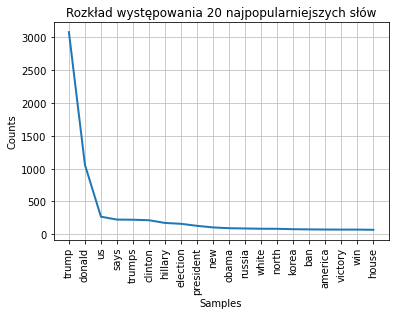

<AxesSubplot:title={'center':'Rozkład występowania 20 najpopularniejszych słów'}, xlabel='Samples', ylabel='Counts'>

In [167]:
all_words.plot(20, title = 'Rozkład występowania 20 najpopularniejszych słów')

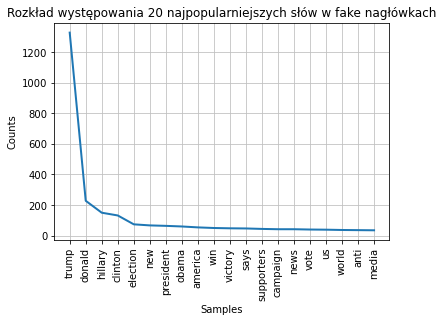

<AxesSubplot:title={'center':'Rozkład występowania 20 najpopularniejszych słów w fake nagłówkach'}, xlabel='Samples', ylabel='Counts'>

In [168]:
words_fake.plot(20, title = 'Rozkład występowania 20 najpopularniejszych słów w fake nagłówkach')

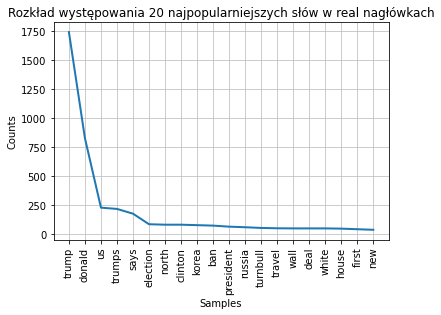

<AxesSubplot:title={'center':'Rozkład występowania 20 najpopularniejszych słów w real nagłówkach'}, xlabel='Samples', ylabel='Counts'>

In [169]:
words_real.plot(20, title = 'Rozkład występowania 20 najpopularniejszych słów w real nagłówkach')

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier